# ***Modelo Random Forest Regression***

In [19]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [20]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'regression_report_linear_simple',
    'regression_report_linear_multiple',
    'regression_report_svr',
    'regression_report_decision_tree',
    'regression_report_randomforest

In [21]:
catalog.load("model_input_table")

[11/20/25 23:09:27] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=154369;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=144712;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Best_Position_Grouped_FW,Best_Position_Grouped_GK,Best_Position_Grouped_MF,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,0,179,69.000000,107500000.0,250000.0,206900000.0,False,False,True,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,0,189,82.000000,93000000.0,140000.0,160400000.0,False,False,True,2022
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,4.0,...,0,182,83.000000,44500000.0,135000.0,91200000.0,True,False,False,2022
3,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,3.0,...,0,172,69.000000,37000000.0,45000.0,77700000.0,False,False,False,2022
4,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,4.0,...,0,177,75.000000,108000000.0,160000.0,186300000.0,False,False,True,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,V. Storsve,17,Norway,50,72,Lillestrøm SK,773,Right,1.0,2.0,...,0,185,64.863656,50000.0,5000.0,113000.0,False,True,False,2020
50522,B. Sinzig,19,Switzerland,50,60,Neuchâtel Xamax,764,Right,1.0,2.0,...,0,190,81.192968,35000.0,5000.0,58000.0,False,True,False,2020
50523,18 N. Krucker,18,Switzerland,50,61,FC St. Gallen,757,Right,1.0,3.0,...,0,183,79.832192,35000.0,1000.0,66000.0,False,True,False,2020
50524,18 A. Viscovo,18,Italy,51,70,Crotone,755,Right,1.0,2.0,...,0,190,78.925008,60000.0,5000.0,146000.0,False,True,False,2020


In [22]:
df_FIFA = catalog.load("model_input_table")

[11/20/25 23:09:28] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=886615;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=240596;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

#### **Importaciones**

In [23]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

# -- Procesado y modelado --
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# -- Metricas --
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

# -- GridSearchCV -- 
from sklearn.model_selection import GridSearchCV

**Conceptos claves**

- Crearemos particiones o nodos en la que se separaran de manera condicional.

- Nodo inicial: llamado es llamado raíz (root)

- Nodos internos: dividen los datos basandose en codiciones > o <. Pueden tener hijos o mas.

- Hojas: Donde no hay mas particiones

RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Funciones pre-definidas: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Funciones personalizadas: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [24]:
X = df_FIFA[["Best Overall Rating","Special","International Reputation","Reactions","Potential"]] # Todos los modelo deben tener la misma combinación de las caracteristicas, 
y = df_FIFA['Value_num']

#### **División de los datos en entrenamiento y prueba**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

#### **Creación y entrenamiento de Random Forest**

In [26]:
modelo = RandomForestRegressor(
                                n_estimators=100,       # número de árboles
                                #max_depth=None,         # sin límite de profundidad (puedes probar valores)
                                #min_samples_split=2,    # mínimo de muestras para dividir un nodo
                                #min_samples_leaf=1,     # mínimo de muestras en una hoja
                                random_state=42
                              )
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### **Predicciones sobre el conjunto de prueba**

In [27]:
y_pred = modelo.predict(X_test)

#### **Métricas de evaluación**

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("-- Métricas de Evaluación del Modelo --")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print(f"R² (Variance score): {r2:.2f}")

-- Métricas de Evaluación del Modelo --
Mean Squared Error (MSE): 3944524458713.584
Root Mean Squared Error (RMSE): 1986082.6918115932
Mean Absolute Error (MAE): 651353.9662059086
R² (Variance score): 0.89


#### **Visualización grafica**

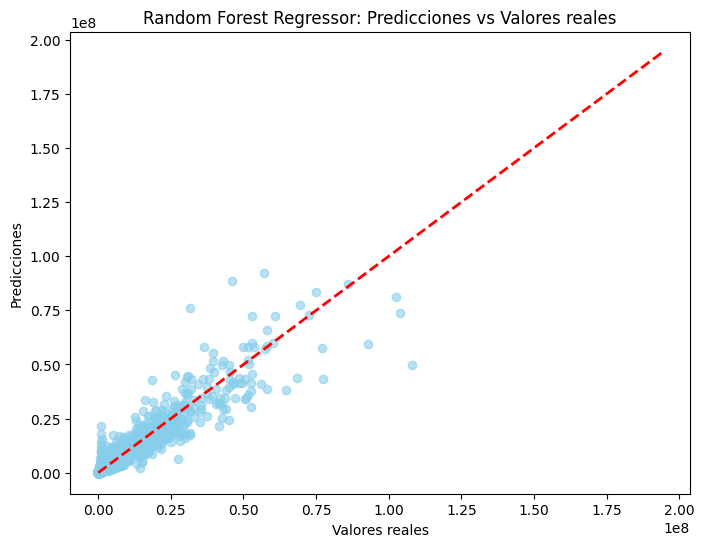

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)  # línea ideal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regressor: Predicciones vs Valores reales')
plt.show()


#### **Importancia de las características**

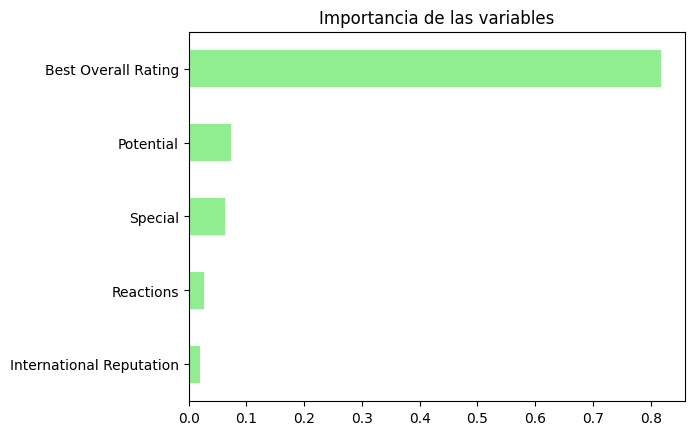

In [30]:
importances = modelo.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='lightgreen')
plt.title("Importancia de las variables")
plt.show()


In [ ]:
# Datos de ejemplo (reemplaza con tus datos)
# X = df[['Overall', 'Age', 'Potential']]
# y = df['Value_num']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_rf = {
    
    'n_estimators': [50, 100],         # menos opciones para entrenamientos más rápidos
    'max_features': ['sqrt', None],    # reducimos de 3 a 2
    'max_depth': [None, 10, 20],       # 3 valores representativos
    'min_samples_split': [2, 10],      # solo valores extremos
    'min_samples_leaf': [1, 4],        # valores bajos y medios
    'criterion': ['squared_error'],    # solo el más común
    'bootstrap': [True]                # solo True para simplificar
}


# Crear GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5, # k-fold cross-validation
    scoring='r2', # optimizar R²
    n_jobs=-1,
    verbose=2
)

# Entrenar
grid_search_rf.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search_rf.best_estimator_
print("Mejores hiperparámetros:", grid_search_rf.best_params_)

# Predicciones
y_pred = best_rf.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Evaluación del mejor modelo:")
print("MSE: ", mse)
print("MAE: ",  mae)
print("RMSE: ", rmse)
print("R^2: ", r2)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
